## Observation from Second network :From 2nd  network( 9919 accuracy in 30 epochs) I made a note that 
###* multiple time addition of Maxpooling won't help in improoving accuracy as we have simple datasets. 
###*   we can reduce no of parameters and try to reach max possible batch size to make good network suitable with minimum available resources

### please Note as in first network i added comments in per block , here skipping:(

##TRY in this network
###1.  Batchnormalization
###2.  Stepwise increase batch size  with constant epochs count
###3.  Further reduce in no of parameters 

##Improvment from Second Network : With  8332 parameters(less from third network) and in 40 epochs achieved 9925 val accuracy

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


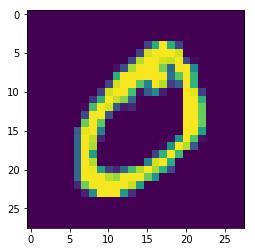

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(10, 3, 3, activation='relu', name ='FirstLayer', input_shape=(28,28,1))) # RF 3x3
model.add(BatchNormalization())
model.add(Convolution2D(12, 3, 3, activation='relu' ,name ='SecondLayer')) # RF 5x5
model.add(BatchNormalization())
model.add(Convolution2D(14, 3, 3, activation='relu' , name ='ThirdLayer')) # RF 7x7
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2))) # RF 14x14

model.add(Convolution2D(10, 3, activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2))) # RF 14x14
model.add(Convolution2D(12, 3, 3, activation='relu' , name ='fourthThirdLayer'))
model.add(BatchNormalization())
model.add(Convolution2D(10, 3, 3, activation='relu' , name ='FifthLayer'))
model.add(BatchNormalization())
model.add(Convolution2D(10, 3, 3, activation='relu' , name ='SixthLayer'))
model.add(Convolution2D(10, 3, 3, activation='relu' , name ='SeventhLayer'))
# model.add(Convolution2D(16, 3, 3, activation='relu' , name ='8Layer'))

model.add(Convolution2D(10, 1))#2


model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", name="FirstLayer", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu", name="SecondLayer")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(14, (3, 3), activation="relu", name="ThirdLayer")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu", name="fourthThirdLayer")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), acti

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
FirstLayer (Conv2D)          (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_8 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
SecondLayer (Conv2D)         (None, 24, 24, 12)        1092      
_________________________________________________________________
batch_normalization_9 (Batch (None, 24, 24, 12)        48        
_________________________________________________________________
ThirdLayer (Conv2D)          (None, 22, 22, 14)        1526      
_________________________________________________________________
batch_normalization_10 (Batc (None, 22, 22, 14)        56        
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 11, 11, 14)        0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

## batchnormalization addition increased epochs time as see val acc is increasing so can be try if it further increased on no of epochs

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10,validation_data=(X_test,Y_test), verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 24s 404us/step - loss: 0.2705 - acc: 0.9162 - val_loss: 0.1023 - val_acc: 0.9702
Epoch 2/10
60000/60000 [==============================] - 20s 339us/step - loss: 0.0734 - acc: 0.9778 - val_loss: 0.0800 - val_acc: 0.9747
Epoch 3/10
60000/60000 [==============================] - 20s 338us/step - loss: 0.0579 - acc: 0.9825 - val_loss: 0.0835 - val_acc: 0.9752
Epoch 4/10
60000/60000 [==============================] - 21s 358us/step - loss: 0.0502 - acc: 0.9841 - val_loss: 0.0529 - val_acc: 0.9825
Epoch 5/10
60000/60000 [==============================] - 20s 338us/step - loss: 0.0440 - acc: 0.9864 - val_loss: 0.0564 - val_acc: 0.9823
Epoch 6/10
60000/60000 [==============================] - 20s 340us/step - loss: 0.0402 - acc: 0.9876 - val_loss: 0.0810 - val_acc: 0.9747
Epoch 7/10
60000/60000 [==============================] - 20s 339us/step - loss: 0.0371 - acc: 0.9887 - val_loss: 0.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.03563861697883403, 0.9894]


## i tried to run epochs 10 to see if at all it goes to 99 accuracy or not.but no improvment in accuracy - but it model start over fitting for both validation / training accuracy

In [0]:
model.fit(X_train, Y_train, batch_size=64, nb_epoch=20,validation_data=(X_test,Y_test), verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 1024/60000 [..............................] - ETA: 10s - loss: 0.0118 - acc: 0.9971

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 11s 186us/step - loss: 0.0072 - acc: 0.9976 - val_loss: 0.0407 - val_acc: 0.9913
Epoch 2/20
60000/60000 [==============================] - 10s 174us/step - loss: 0.0065 - acc: 0.9978 - val_loss: 0.0420 - val_acc: 0.9906
Epoch 3/20
60000/60000 [==============================] - 10s 171us/step - loss: 0.0090 - acc: 0.9970 - val_loss: 0.0528 - val_acc: 0.9897
Epoch 4/20
60000/60000 [==============================] - 10s 171us/step - loss: 0.0064 - acc: 0.9979 - val_loss: 0.0518 - val_acc: 0.9895
Epoch 5/20
60000/60000 [==============================] - 10s 171us/step - loss: 0.0060 - acc: 0.9980 - val_loss: 0.0502 - val_acc: 0.9892
Epoch 6/20
60000/60000 [==============================] - 10s 172us/step - loss: 0.0062 - acc: 0.9980 - val_loss: 0.0496 - val_acc: 0.9909
Epoch 7/20
60000/60000 [==============================] - 11s 183us/step - loss: 0.0074 - acc: 0.9975 - val_loss: 0.0536 - val_acc: 0.9894
Epoch 8/20
60000/60000 [==============

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.060330295272241395, 0.9896]


In [0]:
model.fit(X_train, Y_train, batch_size=128, nb_epoch=10,validation_data=(X_test,Y_test), verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
  640/60000 [..............................] - ETA: 15s - loss: 0.0017 - acc: 0.9984

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 6s 103us/step - loss: 8.9930e-04 - acc: 0.9998 - val_loss: 0.0465 - val_acc: 0.9914
Epoch 2/10
60000/60000 [==============================] - 6s 102us/step - loss: 3.6713e-04 - acc: 1.0000 - val_loss: 0.0468 - val_acc: 0.9919
Epoch 3/10
60000/60000 [==============================] - 6s 93us/step - loss: 2.2545e-04 - acc: 1.0000 - val_loss: 0.0473 - val_acc: 0.9919
Epoch 4/10
60000/60000 [==============================] - 6s 101us/step - loss: 1.7147e-04 - acc: 1.0000 - val_loss: 0.0465 - val_acc: 0.9925
Epoch 5/10
60000/60000 [==============================] - 6s 94us/step - loss: 1.8090e-04 - acc: 1.0000 - val_loss: 0.0500 - val_acc: 0.9920
Epoch 6/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.0052 - acc: 0.9984 - val_loss: 0.0728 - val_acc: 0.9866
Epoch 7/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.0056 - acc: 0.9981 - val_loss: 0.0523 - val_acc: 0.9902
Epoch 8/10
60000/60000 [=====

In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[2.99050025e-36 2.08445877e-36 1.52746910e-27 2.21480862e-15
  0.00000000e+00 2.42125006e-32 0.00000000e+00 1.00000000e+00
  3.93387263e-24 2.87156194e-21]
 [1.06652788e-28 1.78258575e-28 1.00000000e+00 2.27230598e-26
  0.00000000e+00 5.11957825e-37 4.78419271e-26 0.00000000e+00
  4.19622143e-31 0.00000000e+00]
 [1.51047286e-14 1.00000000e+00 1.52135231e-11 1.07835682e-17
  3.43494477e-08 5.98799566e-15 4.05138506e-16 1.32358525e-11
  1.27361344e-10 3.52296306e-18]
 [1.00000000e+00 6.17263173e-38 6.54619589e-21 9.13494366e-33
  9.97972929e-38 9.31880386e-27 1.08082448e-23 2.15645278e-27
  1.37571699e-27 3.94730320e-28]
 [4.22286814e-28 2.91708279e-36 1.53899518e-22 1.29050431e-27
  1.00000000e+00 5.55701272e-31 1.53520991e-26 3.01322090e-20
  2.21571804e-18 2.42923517e-16]
 [5.03640858e-19 9.99999881e-01 2.23713127e-12 1.21150372e-18
  1.53795165e-09 8.56842065e-21 5.28967785e-20 1.38699022e-07
  3.47088663e-10 1.13864204e-16]
 [0.00000000e+00 1.67940884e-30 3.27429003e-16 1.27546310e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored